In [45]:
import pandas as pd
import numpy as np
from sklearn.datasets import  load_iris
iris = load_iris()

In [46]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.shape

(150, 4)

In [49]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [51]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [53]:
df0= df[0:50]
df1= df[50:100]
df2= df[100:]

In [54]:
df.shape

(150, 6)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

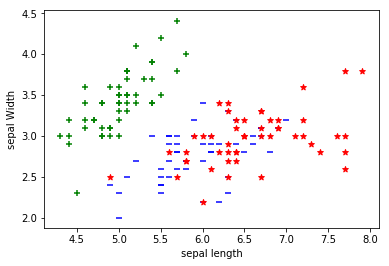

In [56]:
plt.xlabel('sepal length')
plt.ylabel('sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue", marker='_')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red", marker='*')


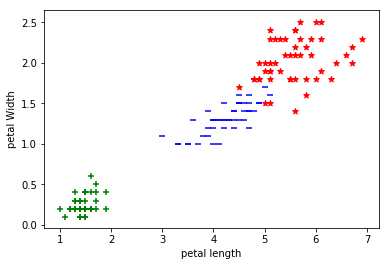

In [57]:
plt.xlabel('petal length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue", marker='_')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red", marker='*')


In [58]:
from sklearn.model_selection import train_test_split


In [59]:
x = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [60]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [61]:
from sklearn.svm import SVC
model = SVC()

In [62]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
model.score(X_train,y_train)

0.98

In [64]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [65]:
model_C = SVC(C=10)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.98

In [66]:
model_g = SVC(gamma=2)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.96

In [67]:
model.linear_kernal = SVC(kernel='rbf')
model.linear_kernal.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
model.linear_kernal.score(X_train, y_train)

0.98

# CAR dataset


In [69]:
import pandas as pd
import numpy as np


In [70]:
#df = pd.read_csv('https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/car.data', 
                 names=['buying','maint','doors','persons','lug_boot','safety','class'])
df.head()

IndentationError: unexpected indent (<ipython-input-70-7bb024e03ca2>, line 2)

In [ ]:
df['class'],class_names = pd.factorize(df['class'])

In [ ]:
df['buying'],_ = pd.factorize(df['buying'])
df['maint'],_ = pd.factorize(df['maint'])
df['doors'],_ = pd.factorize(df['doors'])
df['persons'],_ = pd.factorize(df['persons'])
df['lug_boot'],_ = pd.factorize(df['lug_boot'])
df['safety'],_ = pd.factorize(df['safety'])

In [ ]:
df.head()

In [ ]:
x = df.drop(['class'],axis='columns')

In [ ]:
y = df.iloc[:,-1]


In [ ]:
df.shape

In [ ]:
df0 = df[:432]
df1 = df[432:864]
df2 = df[864:1296]
df3 = df[1296:]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.xlabel('maint')
plt.ylabel('buying')
plt.scatter(df0['maint'], df0['buying'],color="green", marker='+')
plt.scatter(df1['maint'], df1['buying'],color="blue", marker='_')
plt.scatter(df2['maint'], df2['buying'],color="red", marker='*')
plt.scatter(df3['maint'], df3['buying'],color="yellow", marker='.')


In [ ]:
# this dataset is not for SVM

# new dataset of creditcard

In [79]:
data = pd.read_csv("F:\ML\csv files\creditcardfraud\creditcard.csv")

In [80]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [83]:
data.shape

(284807, 31)

In [93]:
x = data.drop(['Class'],axis='columns')


In [86]:
y = df.iloc[:,-1]

In [98]:
fraud = data[data.Class==1]
not_fraud = data[data.Class==0]


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

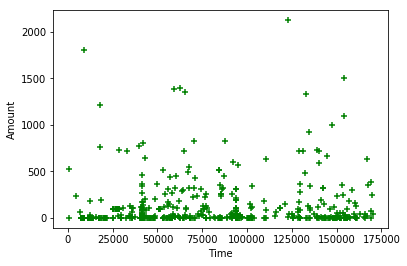

In [116]:
plt.xlabel('Time')
plt.ylabel('Amount')
plt.scatter(fraud['Time'], fraud['Amount'],color="green", marker='+')
#plt.scatter(not_fraud['Time'], not_fraud['Amount'],color="blue", marker='_')


In [119]:
fraud[fraud['Amount']>1000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
95597,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
249239,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
